In [1]:
using Plots, Printf, DelimitedFiles, BenchmarkTools, FFTW
using Revise
using MDToolbox
ENV["COLUMNS"] = 130

┌ Warning: no Manifest.toml file found, static paths used
└ @ Revise /Users/yasu/.julia/packages/Revise/MgvIv/src/Revise.jl:1167
┌ Info: Precompiling MDToolbox [7965e2f0-a35b-11e8-0207-19c030dd2def]
└ @ Base loading.jl:1260


130

In [114]:
q_array = readdlm("data/quaternion/QUATERNION_LIST_36864_Orient")
model_array = readpdb("data/t1r/cluster.pdb");
decenter!(model_array);

In [115]:
for iatom = 1:model_array.natom
    push!(model_array.mass, MDToolbox.defaultParameters()[model_array.resname[iatom]])
end
model_array.mass'

1×1044 LinearAlgebra.Adjoint{Float64,Array{Float64,1}}:
 2.8  2.6  2.95  3.2  3.05  3.1  3.3  2.25  2.8  3.25  3.1  …  2.6  2.6  3.1  3.3  2.6  2.85  2.6  2.75  3.1  2.5  2.8  2.6

In [116]:
for iatom = 1:model_array.natom
    model_array.atomname[iatom] = model_array.resname[iatom]
end

In [117]:
model_array.natom

1044

In [118]:
pdbRotated = MDToolbox.rotate(model_array[1, :], q_array[7, :])

1x1044 TrjArray{Float64,Int64}
| X                          | X                          |  …   X                          | X                          |
| 1THR                       | 2SER                       |  …   1043PRO                    | 1044SER                    |
| 1THR                       | 2SER                       |  …   1043PRO                    | 1044SER                    |
|   -35.48   -14.16     1.18 |   -36.19   -11.12     3.81 |  …      54.09    -5.23    35.45 |    56.93    -5.20    32.97 |

  0.021252 seconds (323.31 k allocations: 7.440 MiB)


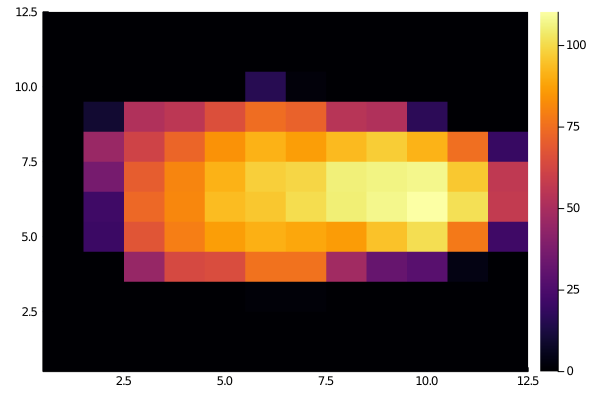

In [172]:
@time calculated = afmize(pdbRotated, MDToolbox.defaultConfig())
heatmap(calculated)

  0.006642 seconds (1.90 k allocations: 10.749 MiB)


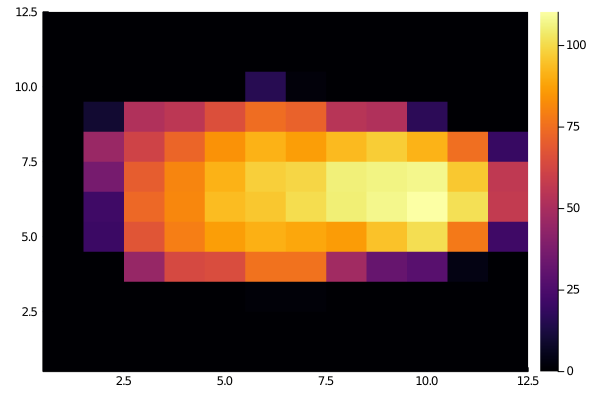

In [173]:
@time calculated2 = MDToolbox.afmize_gpu(pdbRotated, MDToolbox.defaultConfig())
heatmap(calculated2)

In [162]:
calculated

12×12 Array{Float64,2}:
 0.0   0.0       0.0      0.0      0.0      0.0        0.0        0.0       0.0       0.0       0.0       0.0
 0.0   0.0       0.0      0.0      0.0      0.0        0.0        0.0       0.0       0.0       0.0       0.0
 0.0   0.0       0.0      0.0      0.0      1.36122    1.23167    0.0       0.0       0.0       0.0       0.0
 0.0   0.0      44.7523  63.4985  64.7631  75.8912    75.9069    47.8267   31.6803   27.9682    3.61428   0.0
 0.0  20.3561   67.5176  79.065   86.7412  90.8202    88.7647    86.3825   94.9006  101.158    77.9517   21.2791
 0.0  21.4051   73.4004  81.3999  93.5301  95.9357   100.755    105.211   107.61    110.353   101.515    57.4184
 0.0  36.1384   70.1327  80.788   91.2446  97.7747    99.3752   105.546   106.663   107.548    96.1472   56.4775
 0.0  45.5764   60.9271  72.5781  83.9138  91.2875    86.7245    93.034    97.2089   91.5085   75.1112   19.3956
 0.0   9.56877  52.1166  55.3963  65.6571  74.7332    71.5946    54.1733   52.0593  

In [163]:
calculated2

12×12 Array{Float64,2}:
 0.0   0.0       0.0      0.0      0.0      0.0        0.0        0.0       0.0       0.0       0.0       0.0
 0.0   0.0       0.0      0.0      0.0      0.0        0.0        0.0       0.0       0.0       0.0       0.0
 0.0   0.0       0.0      0.0      0.0      1.36122    1.23167    0.0       0.0       0.0       0.0       0.0
 0.0   0.0      44.7523  63.4985  64.7631  75.8912    75.9069    47.8267   31.6803   27.9682    3.61428   0.0
 0.0  20.3561   67.5176  79.065   86.7412  90.8202    88.7647    86.3825   94.9006  101.158    77.9517   21.2791
 0.0  21.4051   73.4004  81.3999  93.5301  95.9357   100.755    105.211   107.61    110.353   101.515    57.4184
 0.0  36.1384   70.1327  80.788   91.2446  97.7747    99.3752   105.546   106.663   107.548    96.1472   56.4775
 0.0  45.5764   60.9271  72.5781  83.9138  91.2875    86.7245    93.034    97.2089   91.5085   75.1112   19.3956
 0.0   9.56877  52.1166  55.3963  65.6571  74.7332    71.5946    54.1733   52.0593  

In [164]:
calculated .- calculated2

12×12 Array{Float64,2}:
 0.0  0.0          0.0          0.0  0.0           0.0          …   0.0           0.0           0.0          0.0
 0.0  0.0          0.0          0.0  0.0           0.0              0.0           0.0           0.0          0.0
 0.0  0.0          0.0          0.0  0.0          -7.10543e-15      0.0           0.0           0.0          0.0
 0.0  0.0          0.0          0.0  1.42109e-14   0.0              0.0          -7.10543e-15   0.0          0.0
 0.0  0.0          0.0          0.0  0.0           0.0             -1.42109e-14   0.0           0.0          7.10543e-15
 0.0  7.10543e-15  0.0          0.0  0.0           0.0          …   0.0           0.0           0.0          0.0
 0.0  7.10543e-15  1.42109e-14  0.0  0.0           0.0              0.0           0.0          -1.42109e-14  0.0
 0.0  1.42109e-14  0.0          0.0  0.0           0.0              0.0           0.0           1.42109e-14  0.0
 0.0  0.0          0.0          0.0  0.0           0.0          

# 並進などのテスト

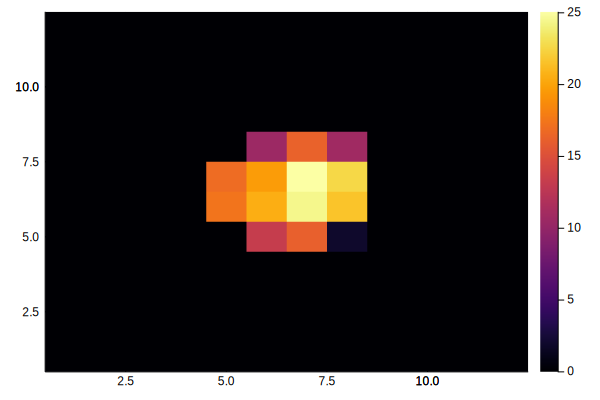

In [5]:
pdbRotated = MDToolbox.rotate(model_array[1, :], q_array[7, :])
calculated = afmize(pdbRotated, MDToolbox.defaultConfig())
observed = calculated
heatmap(observed)

In [28]:
calculated

┌ Warning: Due to a previously reported error, the running code does not match saved version for the following files:
│ 
│   /Users/yasu/gdrive/MDToolbox.jl/src/afm.jl
│ 
│ Use Revise.errors() to report errors again.
└ @ Revise /Users/yasu/.julia/packages/Revise/AMRie/src/Revise.jl:660


12×12 Array{Float64,2}:
 0.0  0.0  0.0  0.0   0.0      0.0      0.0      0.0      0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0   0.0      0.0      0.0      0.0      0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0   0.0      0.0      0.0      0.0      0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0   0.0      0.0      0.0      0.0      0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0   0.0     13.2481  16.1331   1.90415  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  17.3871  20.5284  24.465   21.61     0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  16.8962  19.643   25.0696  22.6061   0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0   0.0     10.5039  16.2694  10.7847   0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0   0.0      0.0      0.0      0.0      0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0   0.0      0.0      0.0      0.0      0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0   0.0      0.0      0.0      0.0      0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0   0.0      0.0      0.0      0.0      0.0  0.0  0.0  0.0

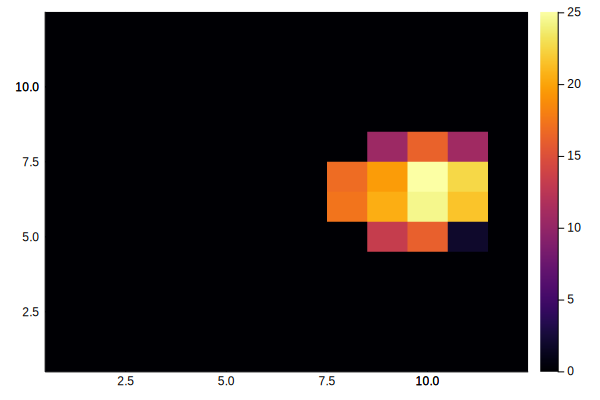

In [14]:
observed_translated = translateafm(observed, (0, 3))
heatmap(observed_translated)

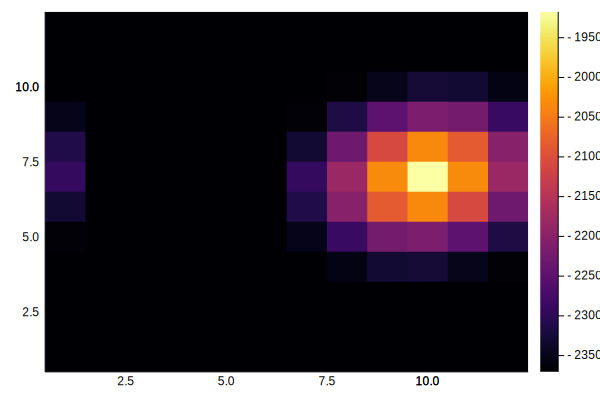

In [15]:
observed_translated = observed_translated .- 100.0
C_o  = sum(observed_translated)
C_c  = sum(calculated)
#@btime C_oc = sum(observed_translated .* calculated)
C_oc = sum(observed_translated .* calculated)
C_cc = sum(calculated.^2)
C_oo = sum(observed_translated.^2)
#@btime C_oc_dxdy = real.(ifftshift(ifft(fft(observed_translated).*conj.(fft(calculated)))))

C_oc_dxdy = real.(ifftshift(ifft(fft(observed_translated).*conj.(fft(calculated)))))
heatmap(C_oc_dxdy)

In [16]:
C_oc_dxdy

12×12 Array{Float64,2}:
 -23704.9  -23704.9  -23704.9  -23704.9  -23704.9  -23704.9  -23704.9  -23704.9  -23704.9  -23704.9  -23704.9  -23704.9
 -23704.9  -23704.9  -23704.9  -23704.9  -23704.9  -23704.9  -23704.9  -23704.9  -23704.9  -23704.9  -23704.9  -23704.9
 -23704.9  -23704.9  -23704.9  -23704.9  -23704.9  -23704.9  -23704.9  -23704.9  -23704.9  -23704.9  -23704.9  -23704.9
 -23704.9  -23704.9  -23704.9  -23704.9  -23704.9  -23704.9  -23704.9  -23562.0  -23315.3  -23282.7  -23504.4  -23684.9
 -23672.7  -23704.9  -23704.9  -23704.9  -23704.9  -23704.9  -23517.4  -22901.1  -22227.6  -22150.4  -22507.8  -23167.9
 -23306.6  -23704.9  -23704.9  -23704.9  -23704.9  -23704.9  -23129.6  -22031.9  -20855.5  -20340.2  -21096.5  -22310.0
 -22947.2  -23704.9  -23704.9  -23704.9  -23704.9  -23704.9  -22947.2  -21829.7  -20335.2  -19174.0  -20335.2  -21829.7
 -23129.6  -23704.9  -23704.9  -23704.9  -23704.9  -23704.9  -23306.6  -22310.0  -21096.5  -20340.2  -20855.5  -22031.9
 -23517.4  -2370

In [17]:
maximum(C_oc_dxdy)

-19174.01603518203

In [18]:
C_oo

1.3971211137502175e6

# Posteriorの計算

In [19]:
-log(0)
log(eps(Float64))

-36.04365338911715

In [20]:
npix = Float64(size(observed_translated, 1) * size(observed_translated, 2))
#logprob = 0.5 .* (3.0 .- npix) .* log.(npix .* (C_cc .* C_oo .- C_oc_dxdy.^2) .+ 2.0 .* C_o .* C_oc_dxdy .* C_c .- C_cc .* C_o.^2 .- C_oo .* C_c.^2) .+ (0.5 .* npix .- 2.0) .* log.((npix .- 2.0) .* (npix .* C_cc .- C_c.^2))
log01 = npix .* (C_cc .* C_oo .- C_oc_dxdy.^2) .+ 2.0 .* C_o .* C_oc_dxdy .* C_c .- C_cc .* C_o.^2 .- C_oo .* C_c.^2
log01[log01 .<= 0.0] .= eps(Float64)
log02 = (npix .- 2.0) .* (npix .* C_cc .- C_c.^2)
log02 = log02 <= 0 ? eps(Float64) : log02
logprob = 0.5 .* (3.0 .- npix) .* log.(log01) .+ (0.5 .* npix .- 2.0) .* log.(log02)

12×12 Array{Float64,2}:
 -246.279  -246.279  -246.279  -246.279  -246.279  -246.279  -246.279  -246.279  -246.279  -246.279  -246.279  -246.279
 -246.279  -246.279  -246.279  -246.279  -246.279  -246.279  -246.279  -246.279  -246.279  -246.279  -246.279  -246.279
 -246.279  -246.279  -246.279  -246.279  -246.279  -246.279  -246.279  -246.279  -246.279  -246.279  -246.279  -246.279
 -246.279  -246.279  -246.279  -246.279  -246.279  -246.279  -246.279  -246.656  -246.908  -246.904  -246.76   -246.342
 -246.379  -246.279  -246.279  -246.279  -246.279  -246.279  -246.739  -246.201  -241.873  -241.102  -244.179  -246.819
 -246.908  -246.279  -246.279  -246.279  -246.279  -246.279  -246.767  -239.795  -216.24   -195.743  -223.061  -242.63
 -246.35   -246.279  -246.279  -246.279  -246.279  -246.279  -246.35   -237.203  -195.488  3818.87   -195.488  -237.203
 -246.767  -246.279  -246.279  -246.279  -246.279  -246.279  -246.908  -242.63   -223.061  -195.743  -216.24   -239.795
 -246.739  -246.2

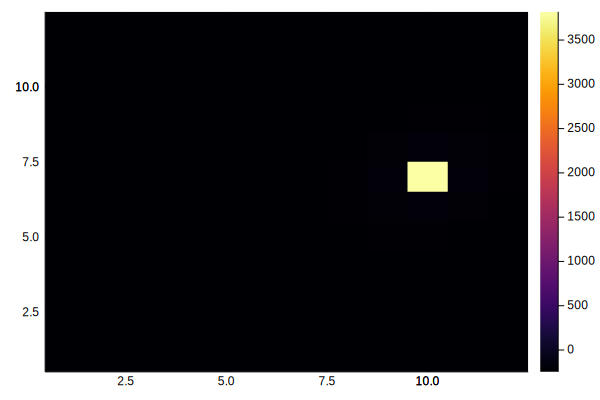

In [21]:
heatmap(logprob)

In [22]:
maximum(logprob)

3818.87463782765

In [23]:
argmax(logprob)

CartesianIndex(7, 10)

In [24]:
x_center = ceil(Int32, (size(observed,1)/2)+1.0)
y_center = ceil(Int32, (size(observed,2)/2)+1.0)

dx_estimated = argmax(logprob)[1] - x_center
dy_estimated = argmax(logprob)[2] - y_center
tra

(0, 3)

# やること

- ピクセル数は典型的なAFM像の場合で固定
- ランダムに連続的な角度でAFM像を100個ほど生成
- ベスト構造を推定して答えからのRMSDを求める
- それを様々な「Quaternionの数」「probeRadius」「ノイズの大きさ」でプロット
